In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import scipy
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
data,targets=load_wine(return_X_y=True)
data_normalized=scipy.stats.zscore(data)
data_train,data_test,target_train,target_test=train_test_split(data_normalized,targets,test_size=0.5,random_state=1)
#データを正規化したうえ分ける

In [49]:
number,d=data_train.shape
number_test,_=data_test.shape
print(number,d,number_test)

89 13 89


In [50]:
def softmax_return_array(a):
    a_max=max(a)
    x=np.exp(a-a_max)
    u=np.sum(x)
    return x/u
#ソフトマックス関数、発散しないように最大値を引いてからexpにかける

In [51]:
w=np.random.rand(d,3)
T=np.zeros((number,3))
for i in range(number):
    if target_train[i]==0:
        T[i][0]=1
    elif target_train[i]==1:
        T[i][1]=1
    elif target_train[i]==2:
        T[i][2]=1
P=np.zeros((number,3))
#パラメータの初期値はランダムに選ぶ、one-of-K符号化法でクラスを表す

In [52]:
times=0
max_times=1000
learning_rate=0.3
correct_numbers=[]
while True:
    y=np.dot(data_train,w)
    for i in range(number):
        P[i]=softmax_return_array(y[i])
    max_index=np.argmax(P,axis=1)
    correct_matrix=(max_index==target_train)
    correct=np.sum(correct_matrix.astype(np.int))
    correct_numbers.append(correct)
    if correct==number:
        break
        
    delta_J=np.dot(data_train.T,P-T)
    w=w-learning_rate*delta_J
    times+=1
    if times>max_times:
        break

In [53]:
y_test=np.dot(data_test,w)
P_test=np.zeros((number_train,3))
for i in range(number_train):
    P_test[i]=softmax_return_array(y[i])
max_index=np.argmax(P_test,axis=1)
correct_matrix=(max_index==target_test)
correct=np.sum(correct_matrix.astype(np.int))
print('正解率は: ',correct/number_test*100,'%')

正解率は:  35.95505617977528 %


In [54]:
rate=np.array(correct_numbers)/number*100

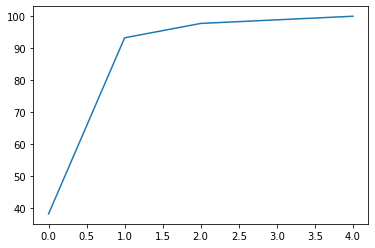

In [55]:
plt.plot(rate)